In [2]:
# Kod dla wykresu z mapa

In [37]:
import pandas as pd 
import numpy as np
from util.getData import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.basemap import Basemap

In [6]:
df = getData(["Origin", "Dest", "Cancelled"])

In [8]:
airports = getAirports()
airports = airports[["iata", "lat", "long"]]

In [66]:
df1 = df.query("Cancelled == 0")[["Origin", "Dest"]]

In [67]:
df1["flights"] = df1.groupby(["Origin", "Dest"])["Origin"].transform("count")
df1 = df1.drop_duplicates()
df1 = df1.sort_values("flights", ascending=False).head(20)
df1

,Origin,Dest,flights
1027,SFO,LAX,315478
95,LAX,SFO,313877
1180,LAX,LAS,280497
1371,LAS,LAX,274848
111,PHX,LAX,267357
1544,LAX,PHX,266103
50499,ORD,MSP,231916
53218,MSP,ORD,231347
35230,PHX,LAS,230932
35142,LAS,PHX,228127


In [61]:
df2 = df1.merge(airports, left_on="Origin", right_on="iata")[["Origin",	"Dest",	"lat", "long"]]
df2 = df2.rename(columns={"lat" : "OriginLat", "long": "OriginLong"})
df2 = df2.merge(airports, left_on="Dest", right_on="iata")[["Origin",	"Dest", "OriginLat", "OriginLong", "lat", "long"]]
df2 = df2.rename(columns={"lat" : "DestLat", "long": "DestLong"})
df2

,Origin,Dest,OriginLat,OriginLong,DestLat,DestLong
0,SFO,LAX,37.619002,-122.374843,33.942536,-118.408074
1,LAS,LAX,36.080361,-115.152333,33.942536,-118.408074
2,PHX,LAX,33.434167,-112.008056,33.942536,-118.408074
3,ORD,LAX,41.979595,-87.904464,33.942536,-118.408074
4,OAK,LAX,37.721291,-122.220717,33.942536,-118.408074
5,LAX,SFO,33.942536,-118.408074,37.619002,-122.374843
6,LAX,LAS,33.942536,-118.408074,36.080361,-115.152333
7,PHX,LAS,33.434167,-112.008056,36.080361,-115.152333
8,LAX,PHX,33.942536,-118.408074,33.434167,-112.008056
9,LAS,PHX,36.080361,-115.152333,33.434167,-112.008056


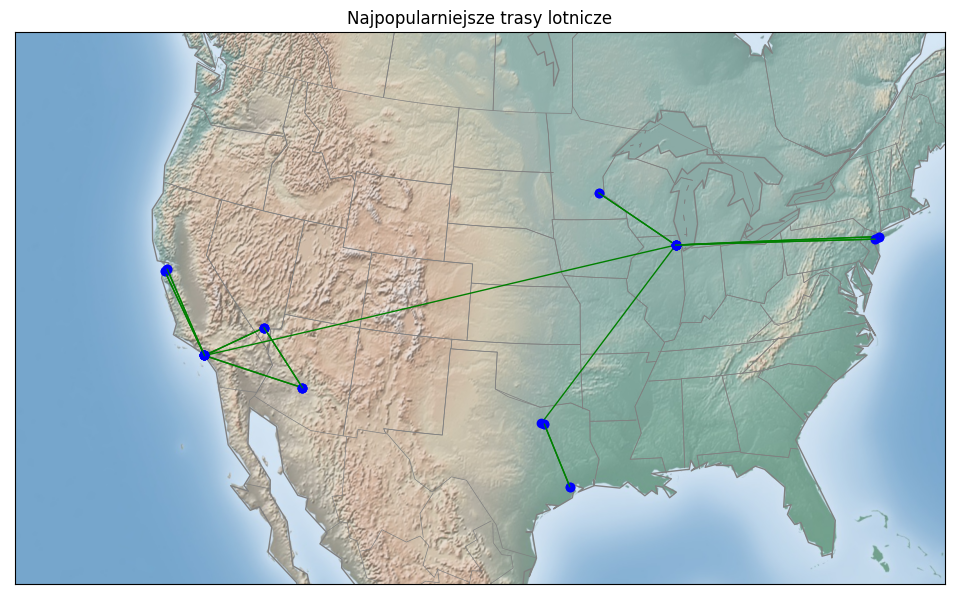

In [68]:
# Utworzenie mapy
fig = plt.figure(figsize=(12, 8))
m = Basemap(llcrnrlon=-125, llcrnrlat=20, urcrnrlon=-65, urcrnrlat=50, projection='lcc', lat_1=33, lat_2=45, lon_0=-95)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# Narysowanie tras
for index, row in df2.iterrows():
    x, y = m(row['OriginLong'], row['OriginLat'])
    m.plot(x, y, 'bo', markersize=6)
    x, y = m(row['DestLong'], row['DestLat'])
    m.plot(x, y, 'bo', markersize=6)
    m.drawgreatcircle(row['OriginLong'], row['OriginLat'], row['DestLong'], row['DestLat'], color='g', linewidth=1)

# Wyświetlenie wykresu
plt.title('Najpopularniejsze trasy lotnicze')
plt.show()